### Bibliotecas

In [ ]:
# Instalação manual de bibliotecas
!pip install numpy matplotlib pandas seaborn
# Bibliotecas


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math


# Questões Práticas

## 1) Para a base Car Evaluation, considerando que o primeiro atributo é x1, o segundo é x2 e assim por diante, estime as probabilidades:


In [92]:
## Leitura inicial

# features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
features   = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
data = pd.read_csv('data/car.data', header = None, names = features)

data.head()

,x1,x2,x3,x4,x5,x6,x7
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### a) P(x1 =med) e P(x2 = low)

Para estimar as probabilidades, usamos a equação:

$$ P(x) = \frac{N(x)}{N(\Omega)}$$

Onde $N$ denota quantidade de amostras e $\Omega$ é o espaço amostral. $N(\Omega)$ representa o número de amostras totais, ou seja, todas as possibilidades do espaço amostral.

In [93]:
n1 = len(data[data['x1'] == 'med'])
n_omega_1 = len(data)
p1 = n1/n_omega_1

print(f"P(x1 = med) = {n1}/{n_omega_1}")
print(f"P(x1 = med) = {p1}")

P(x1 = med) = 432/1728
P(x1 = med) = 0.25


In [94]:
n2 = len(data[data['x2'] == 'low'])
n_omega_2 = len(data)
p2 = n2/n_omega_2

print(f"P(x2 = low) = {n2}/{n_omega_2}")
print(f"P(x2 = low) = {p2}")

P(x2 = low) = 432/1728
P(x2 = low) = 0.25



### b) P(x6=high|x3=2) e P(x2=low|x4=4)


O calculo da probabilidade condicional, ou seja, quando há uma informação a priori, usa o mesmo princípio da probabilidade regular. A distinção é feita no espaço amostral, pois já se presume uma condição $A$. Dessa forma, o espaço amostral se reduz de $\Omega$ para $A$, ou seja, o número total de possibilidades agora é o número de amostras com o atributo A. O evento desejado é aquele em que $A$ e $x$ ocorrem simultaneamente:

$$ P(x | A) = \frac{N(x \cap A)}{N(A)}$$

In [95]:
n3 = len(data[(data['x6'] == 'high') & (data['x3'] == '2')])
n_omega_3 = len(data[data['x3'] == '2'])
p3 = n3/n_omega_3

print(f"P(x6 = high | x3 = 2) = {n3}/{n_omega_3}")
print(f"P(x6 = high | x3 = 2) = {p3}")

P(x6 = high | x3 = 2) = 144/432
P(x6 = high | x3 = 2) = 0.3333333333333333


In [96]:
n4 = len(data[(data['x2'] == 'low') & (data['x4'] == '4')])
n_omega_4 = len(data[data['x4'] == '4'])
p4 = n4/n_omega_4

print(f"P(x2 = low | x4 = 4) = {n4}/{n_omega_4}")
print(f"P(x2 = low | x4 = 4) = {p4}")

P(x2 = low | x4 = 4) = 144/576
P(x2 = low | x4 = 4) = 0.25


### c) P(x1=low|x2=low,X5=small) e P(x4=4|x1=med,X3=2)


Aplicamos o mesmo princípio da letra b). Ao invés de apenas uma condição a priori, agora temos duas. Basta reduzir o espaço amostral da forma apropriada, considerando ambas as condições:

In [97]:
n5 = len(data[(data['x1'] == 'low') & (data['x2'] == 'low') & (data['x5'] == 'small')])
n_omega_5 = len(data[(data['x2'] == 'low') & (data['x5'] == 'small')])
p5 = n5/n_omega_5

print(f"P(x1 = low | x2 = low, X5 = small) = {n5}/{n_omega_5}")
print(f"P(x1 = low | x2 = low, X5 = small) = {p5}")

P(x1 = low | x2 = low, X5 = small) = 36/144
P(x1 = low | x2 = low, X5 = small) = 0.25


In [98]:
n6 = len(data[(data['x4'] == '4') & (data['x1'] == 'med') & (data['x3'] == '2')])
n_omega_6 = len(data[(data['x1'] == 'med') & (data['x3'] == '2')])
p6 = n6/n_omega_6

print(f"P(x4 = 4 | x1 = med, X3 = 2) = {n6}/{n_omega_6}")
print(f"P(x4 = 4 | x1 = med, X3 = 2) = {p6}")

P(x4 = 4 | x1 = med, X3 = 2) = 36/108
P(x4 = 4 | x1 = med, X3 = 2) = 0.3333333333333333


### d) P(x2= vhigh,X3=2|X4=2) e P(x3=4,x5=med|x1=med)

Dessa vez, é colocada apenas uma condição a priori, porém dois eventos. Novamente, basta que ajustemos o espaço amostral (denominado) de forma apropriada, englobando todos os possíveis eventos a priori, e consideremos o número de eventos desejado (numerador) como a interseção de todos os eventos:

In [99]:
n7 = len(data[(data['x2'] == 'vhigh') & (data['x3'] == '2') & (data['x4'] == '2')])
n_omega_7 = len(data[data['x4'] == '2'])
p7 = n7/n_omega_7

print(f"P(x2 = vhigh | x3 = 2, X4 = 2) = {n7}/{n_omega_7}")
print(f"P(x2 = vhigh | x3 = 2, X4 = 2) = {p7}")

P(x2 = vhigh | x3 = 2, X4 = 2) = 36/576
P(x2 = vhigh | x3 = 2, X4 = 2) = 0.0625


In [100]:
n8 = len(data[(data['x3'] == '4') & (data['x5'] == 'med') & (data['x1'] == 'med')])
n_omega_8 = len(data[data['x1'] == 'med'])
p8 = n8/n_omega_8

print(f"P(x3 = 4, x5 = med | x1 = med) = {n8}/{n_omega_8}")
print(f"P(x3 = 4, x5 = med | x1 = med) = {p8}")

P(x3 = 4, x5 = med | x1 = med) = 36/432
P(x3 = 4, x5 = med | x1 = med) = 0.08333333333333333


## 5) Encontre as regras de associação entre os itens abaixo usando o algoritmo Apriori, considerando confiança ≥ 0,9 e suporte ≥ 0,5. Não precisa implementar o método, mas mostre os passos de desenvolvimento para chegar nos resultados. Considere que 1 significa que o item está na “cesta de compras” e 0 que ele não está na cesta.

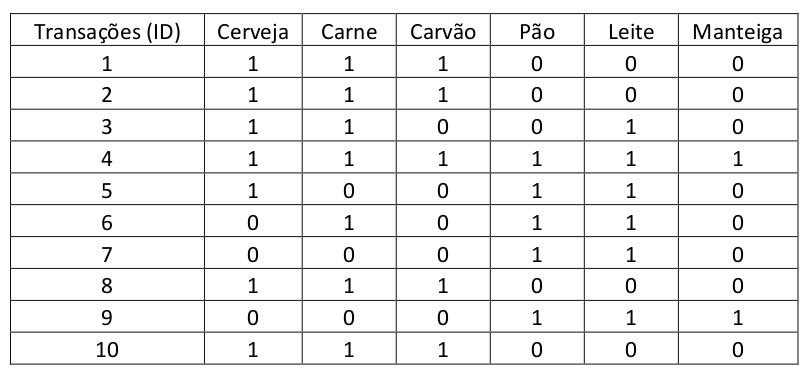

De acordo com a lista de transações, definimos:

- 1 Cerveja; 
- 2 Carne;
- 3 Carvão;
- 4 Pão;
- 5 Leite;
- 6 Manteiga;

De acordo com essa definição, temos a lista de transações:

- t0 = [1,2,3]
- t1 = [1,2,3]
- t2 = [1,2,5]
- t3 = [1,2,3,4,5,6]
- t4 = [1,4,5]
- t5 = [2,4,5]
- t6 = [4,5] 
- t7 = [1,2,3]
- t8 = [4,5,6]
- t9 = [1,2,3]

Os requerimentos são confiança $\ge 0,9$ e suporte $\ge 0,5$.

Sendo $n$ o número de transações que atende à condição entre parênteses, temos que:

- O grau de suporte de $A \to B$ é calculado pela equação:

$$sup(A \to B) = \frac{n(A \cup B)}{n(total)}$$

- O grau de confiança de $A \to B$ é calculado pela equação:

$$conf(A \to B) = \frac{n(A \cup B)}{n(A)}$$



Para 10 transações, o requerimento de confiança exige que o número mínimo de aparições de um conjunto seja de 5 vezes. Os conjuntos que aparecem 5 ou mais vezes são, para cada número de elementos (k):

### k = 1:

- [1],
- [2],
- [3],
- [4],
- [5]


### k = 2:

- [1,2],
- [1,3],
- [2,3],
- [4,5]


### k = 3:

- [1,2,3]


Feito isso, calculamos o grau de confiança de todas as associações, e selecionamos as iguais ou superiores a 0,9.

### k = 2

- [1] => [2] = 6/7 = 0,857

- [2] => [1] = 6/7 = 0,857

- [1] => [3] = 5/7 = 0,714

- [3] => [1] = 5/5 = 1,000

- [1] => [4] = 2/7 = 0,286

- [4] => [1] = 2/5 = 0,400

- [1] => [5] = 3/7 = 0,429

- [5] => [1] = 3/6 = 0,500

- [2] => [3] = 5/7 = 0,714

- [3] => [2] = 5/5 = 1,000

- [2] => [4] = 2/7 = 0,286

- [4] => [2] = 2/5 = 0,400

- [2] => [5] = 3/7 = 0,429

- [5] => [2] = 3/6 = 0,500

- [3] => [4] = 1/5 = 0,200

- [4] => [3] = 1/5 = 0,200

- [3] => [5] = 1/5 = 0,200

- [5] => [3] = 1/6 = 0,167

- [4] => [5] = 5/5 = 1,000

- [5] => [4] = 5/6 = 0,833



### k = 3

- [1]   => [2,3] = 5/7 = 0,714
- [1]   => [4,5] = 2/7 = 0,286
- [2,3] => [1] = 5/5 = 1,000
- [4,5] => [1] = 2/5 = 0,400


- [2] => [1,3] = 5/7 = 0,714
- [2] => [4,5] = 2/7 = 0,286
- [1,3] => [2] = 5/5 = 1,000
- [4,5] => [2] = 2/5 = 0,400
- [3] => [1,2] = 4/5 = 0,800
- [3] => [4,5] = 1/5 = 0,200
- [1,2] => [3] = 4/6 = 0,667
- [4,5] => [3] = 1/5 = 0,200
- [4] => [1,2] = 1/5 = 0,200
- [4] => [1,3] = 1/5 = 0,200
- [4] => [2,3] = 1/5 = 0,200
- [1,2] => [4] = 1/6 = 0,167
- [1,3] => [4] = 1/5 = 0,200
- [2,3] => [4] = 1/5 = 0,200
- [5] => [1,2] = 1/6 = 0,167
- [5] => [1,3] = 1/6 = 0,167
- [5] => [2,3] = 1/6 = 0,167
- [1,2] => [5] = 1/6 = 0,167
- [1,3] => [5] = 1/5 = 0,200
- [2,3] => [5] = 1/5 = 0,200

### k = 4

- [4] => [1,2,3] = 1/5 = 0,200
- [1,2,3] => [4] = 1/5 = 0,200

- [5] => [1,2,3] = 1/6 = 0,167
- [1,2,3] => [5] = 1/5 = 0,200

### k = 5

- [1,2,3] => [4,5] = 1/5 = 0,200

- [4,5] => [1,2,3] = 1/5 = 0,200

### As regras de associação escolhidas, que atendem a condição de grau de confiança igual ou superior a 0,9 são:

- [3] => [1]    (conf = 1,000)
- [3] => [2]    (conf = 1,000)
- [4] => [5]    (conf = 1,000)
- [2,3] => [1]  (conf = 1,000)
- [1,3] => [2]  (conf = 1,000)

# Questões teóricas

## 1) Explique o porquê do classificador Naive Bayes ser robusto a um atributo com valor constante ao longo de todas as amostras de um conjunto de dados.

O classificador Naive Bayes parte do pressuposto de que os valores dos atributos de cada amostra são independentes entre si, ou seja, que não há correlação entre um atributo x1 e outro atributo qualquer da mesma amostra, x2.

A partir dessa premissa, ele realiza a classificação da seguinte forma:
- Calcula-se a probabilidade de, dado os atributos de uma amostra, aquela amostra pertencer a uma classe determinada
- Repete-se o processo, para cada uma das classes possíveis
- A classe com maior probabilidade, dado o conjunto de atributos de uma amostra, é escolhida para a classificação.

A probabilidade de uma amostra pertencer à cada classe é calculada a partir da frequência e cada classificação dado os atributos das amostras do grupo de treinamento. 

Um atributo cujo valor é o mesmo para todas as amostras de treinamento não afeta de forma tão significativa o método, pois a probabilidade se torna a mesma para todas as classes. O método não irá tender a nenhuma classe em particular por consequência desse atributo.

## 2) Explique com suas palavras como funciona o algoritmo DBSCAN para agrupar as amostras.

O Algoritmo DBSCAN requer dois hiperparâmetros: $Eps$ e $MinPts$.

$Eps$ representa o raio de agrupamento, e $MinPts$ representa um número mínimo de pontos.

Munido desses dois valores, o algoritmo irá analisar ponto por ponto. Para um determinado ponto $P_i$, o algoritmo irá verificar quantos outros pontos existem dentro do raio $Eps$ de distância desse ponto. Se o número de pontos for maior ou igual a $MinPts$, o ponto $P_i$ é denominado como um ponto de núcleo. O processo é repetido até que todos os pontos tenham sido avaliados.

Quando dois pontos de núcleo estão dentro do raio de agrupamento um do outro, eles formam um grupo, ou cluster. Pontos dentro do raio de agrupamento de pontos de núcleo mas que não são eles mesmos pontos de núcleo são denominados pontos de borda. Pontos fora do raio de borda de qualquer ponto de núcleo são outliers, e não pertencem a agrupamentos.

Partindo dessas definições, o algoritmo constrói grupos (clusters), e cada grupamento define uma classe distinta.